## $\color{SkyBlue}{\text{Weather Analysis}}$
#### $\color{SkyBlue}{\text{Roman Lynch}}$


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

$\rule{27cm}{0.4pt}$
### K-Means Algorithm

In [22]:
#--------------------------------------------------------------------------------#
def dist(x1, x2):
    return np.sqrt(np.sum(x1-x2)**2)
#--------------------------------------------------------------------------------#

In [23]:
#--------------------------------------------------------------------------------#
def kMeans(df, k=4, tol=0.05): 
    """
    Usage: input 
        df=data frame, 
        k=# of clusters
        tol=tolerance for L_2 convergance check on centroids
    """    
    #---------------------------------------#
    #-- Initialize --#
    clusters = np.zeros(len(df))
    centroids = df.sample(k).values
    mean_error = np.inf
    converged = False
    
    num_iterations = 0
    
    #---------------------------------------#
    #-- LOOP UNTIL CONVERGENCE --#
    while not(converged):
        
        #-- Cluster Assignment --#
        for index, data in enumerate(df.values):
            distances = [dist(data, centroid) for centroid in centroids]
            clusters[index] = np.argmin(distances)
        
        #-- Update Centroids --#
        updated_centroids = np.empty((k, df.shape[1]))
        for index in range(k):
            clust_data = df[clusters == index]
            centroid = clust_data.mean(axis=0)
            updated_centroids[index, :] = centroid
            
        #-- Calculate Meanerror --#
        errors = []
        for data, cluster in zip(df.values, clusters):
            centroid = updated_centroids[int(cluster)]
            errors.append(dist(data, centroid)**2)
        
        error_arr = np.array(errors)
        
        #-- Calculate Reconstruction Error --#
        rec_err = np.sum(error_arr)/len(df)
        
        #-- Check for Convergence --#
        if (abs(rec_err - mean_error) < tol):
            converged = True
#             print('Converged at iteration {} with a change of {}'.format(num_iterations, abs(rec_err - mean_error)))
        
        # Update Values
        centroids = updated_centroids
        mean_error = rec_err
        num_iterations = num_iterations + 1
        
    #---------------------------------------#
    return centroids, clusters, mean_error
#--------------------------------------------------------------------------------#

$\rule{27cm}{0.4pt}$ 
### Dataframe Composition

In [25]:
# Read in CSV files
df_weather = pd.read_csv("data/city_temperature.csv")
df_rankings = pd.read_csv("data/rankings.csv")
df_teams = pd.read_csv("data/team.csv")

# Only take important columns
df_weather = df_weather[['City', 'Year', 'AvgTemperature']]
df_rankings = df_rankings[['Team', 'Rank', 'Year']]
df_teams = df_teams[['full_name', 'abbreviation', 'city']]

#temp = df_weather[df_weather['City'] == 'Denver']
#temp2 = temp[temp['Year'] == 2018]

#print(temp2['AvgTemperature'].head(5))
# Clean "*" from all teams in df_rankings
for i in range(len(df_rankings)):
    if (df_rankings["Team"].iloc[i].find('*')):
        df_rankings["Team"].iloc[i] = df_rankings["Team"].iloc[i].replace('*', '')

#print(df_weather.head(5))
#print(df_rankings.head(5))
#print(df_teams.head(5))

#world_cities = df_weather['City'].unique()
nba_cities = list(df_teams['city'].unique())

df_weather = df_weather[df_weather['City'].isin(nba_cities)]

# Average the temperatures for each year and city such that there is only one instance of each city per year
df_weather = df_weather.groupby(['City', 'Year'])['AvgTemperature'].mean().reset_index()

# Create the master dataframe by including wether, city, team, and rank
df_merged = pd.merge(df_rankings,df_teams, left_on="Team", right_on="full_name")
df_master = pd.merge(df_weather, df_merged, left_on=['City', 'Year'], right_on=['city', 'Year'])

print(df_master.head(5))



C:\Users\roman\AppData\Local\Temp\ipykernel_21316\987831077.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_weather = pd.read_csv("data/city_temperature.csv")
C:\Users\roman\AppData\Local\Temp\ipykernel_21316\987831077.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rankings["Team"].iloc[i] = df_rankings["Team"].iloc[i].replace('*', '')
C:\Users\roman\AppData\Local\Temp\ipykernel_21316\987831077.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rankings["Team"].iloc[i] = df_rankings["Team"].iloc[i].replace('*', '')
C:\Users\roman\AppData\Local

      City  Year  AvgTemperature            Team  Rank       full_name  \
0  Atlanta  2018       63.807123   Atlanta Hawks    15   Atlanta Hawks   
1  Atlanta  2019       65.569041   Atlanta Hawks    12   Atlanta Hawks   
2  Atlanta  2020       56.061940   Atlanta Hawks    14   Atlanta Hawks   
3   Boston  2018       52.716438  Boston Celtics     2  Boston Celtics   
4   Boston  2019       53.131781  Boston Celtics     4  Boston Celtics   

  abbreviation     city  
0          ATL  Atlanta  
1          ATL  Atlanta  
2          ATL  Atlanta  
3          BOS   Boston  
4          BOS   Boston  


In [34]:
df_18 = df_master[df_master["Year"] == 2018]
df_19 = df_master[df_master["Year"] == 2019]
df_20 = df_master[df_master["Year"] == 2020]
df_21 = df_master[df_master["Year"] == 2021]
df_22 = df_master[df_master["Year"] == 2022]

print(df_18.shape[0])
print(df_19.shape[0])
print(df_20.shape[0])

# No wether data for 2021 and 2022
print(df_21.shape[0])
print(df_22.shape[0])

21
21
21
0
0


In [35]:
#--------------------------------------------------------------------------------#
## Use k-Means for clustering
centroids_20, clusters_20, mean_error_20 = kMeans(df_20[["Rank", "AvgTemperature"]], k=3)
centroids_19, clusters_19, mean_error_19 = kMeans(df_19[["Rank", "AvgTemperature"]], k=3)
centroids_18, clusters_18, mean_error_18 = kMeans(df_18[["Rank", "AvgTemperature"]], k=3)
#--------------------------------------------------------------------------------#

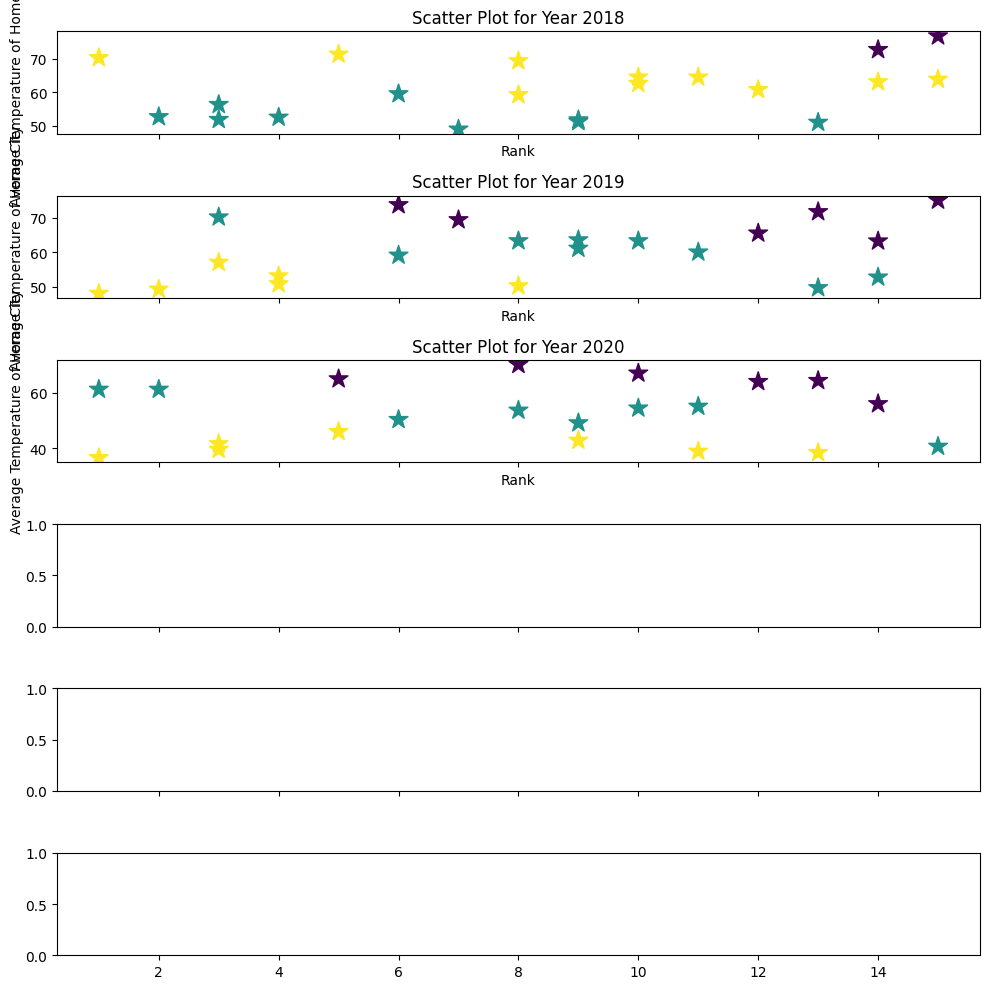

In [43]:
#--------------------------------------------------------------------------------#
dataframes = [df_18, df_19, df_20, df_21, df_22]
clusters = [clusters_18, clusters_19, clusters_20]
years = [2018, 2019, 2020, 2021, 2022, 2023]

## Initialize Plot
fig, axes = plt.subplots(len(years), 1, figsize=(10, 10), sharex=True)

# Loop: Scatter Plot for each Year
for i, (year, dataframe, cluster) in enumerate(zip(years, dataframes, clusters)):
    ax = axes[i]
    ax.scatter(dataframe['Rank'], dataframe['AvgTemperature'], c=cluster, marker='*', s=200)
    ax.set_xlabel("Rank")
    ax.set_ylabel("Average Temperature of Home City")
    ax.set_title("Scatter Plot for Year " + str(year))

plt.tight_layout()
plt.show()

plt.show()

#--------------------------------------------------------------------------------#